**Descrição**

Dataset: Classificação binária com um conjunto de dados de fraude de cartão de crédito

Link: https://www.kaggle.com/competitions/playground-series-s3e4/data?select=train.csv

O dataset apresenta um conjunto de transações bancárias ocorridas durante 2 dias.
Dessas transações, ocorreram 469 fraudes em quase 219129 transações. Aqui o principal
problema é lidar com o desbalanceamento do dataset. O problema é classificado
como classificação binária.

O dataset apresenta 30 colunas de features, 28 são características das transações
transformadas por PCA (devido a dados confidenciais, os dados originais, utilizados
na transformação, não foram fornecidos), as outras duas colunas são, respectivamente,
o tempo decorrido entre cada transação e o valor da transação. Como saída,
se espera uma classificação binária das transações, 1 para fraude e 0 caso não
tenha sido fraude.

Principais Métricas analisadas: AUC, Recall e Precisão.

**Modelos**

KNN: Nesse modelo, uma instância é classificada como a classe mais como entre as K instâncias mais próximas.

Perceptron: funciona como uma rede neural simplificada de uma camada. O processo de treinamento do perceptron envolve a ajuste dos pesos sinápticos para que o modelo possa aprender a classificar corretamente os dados de treinamento. Durante o treinamento, os exemplos de treinamento são apresentados um por um ao perceptron, e o modelo faz uma previsão para cada exemplo. Em seguida, a diferença entre a previsão e o rótulo verdadeiro é calculada, e os pesos sinápticos são atualizados de acordo com essa diferença.

Decision Tree: O processo de construção de uma árvore de decisão envolve a divisão recursiva do conjunto de dados com base em atributos, a fim de criar partições que sejam mais homogêneas em relação à classe. A decisão de qual atributo usar para dividir o conjunto de dados é feita com base em uma medida de impureza.

FNN: FNN é uma rede neural artificial em que a informação flui apenas em uma direção, dos nós de entrada para os nós de saída, sem formar ciclos. Ela é composta por camadas de neurônios interconectados, onde cada neurônio realiza uma combinação linear ponderada das entradas e passa o resultado por uma função de ativação.

CatBoost: Seleciona um melhor modelo de decision tree. A precisão é verificada no conjunto de dados de validação, tirado do conjunto de dados de treinamento.Cada árvore sucessiva é construída com perda reduzida em comparação com as árvores anteriores.

Uma das principais diferenças entre o CatBoost e os demais algoritmos de boost é sua implementação de symmetric trees. Isso significa que o mesmo critério de divisão é usado em todo o nível da árvore. Essas árvores são balanceadas, sendo menos propensas a overfitting e permitem acelerarem significativamente a execução do modelo no momento do teste.

**Import**

Importação de bibliotecas e pacotes utilizados.

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc
import seaborn as sns
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import tensorflow as tf
from catboost import CatBoostClassifier

**Carregamento**

Carregamento do data set

In [ ]:
data_train = pd.read_csv("train.csv")
data_train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


**Análise**

Mostra como é a dritribuição de intâncias entre as labels.

In [ ]:
print(data_train['Class'].value_counts())

0    218660
1       469
Name: Class, dtype: int64


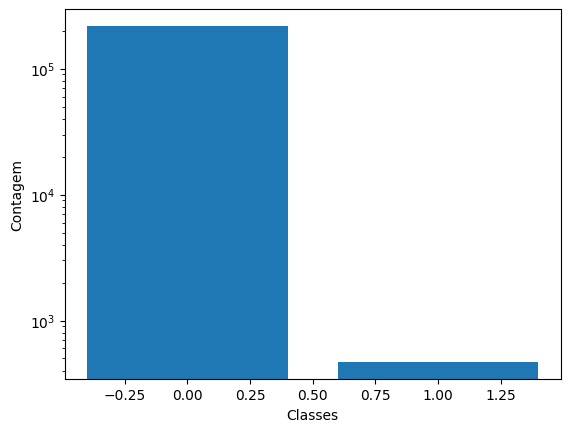

In [ ]:
classes = [0, 1]
cont = [218660, 469]
plt.bar(classes, cont)
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.yscale('log')
plt.show()

Mostra o tipo de dado presente em cada coluna e a quantidade de memória usada pelo dataset

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

Verifica se há instâncias com features vazias

In [ ]:
data_train.dropna(axis=0)
data_train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


Verifica se há instâncias duplicadas.

In [ ]:
duplicadas = data_train.duplicated()
if duplicadas.any():
    print("True")
else:
    print("False")

False


**Tratamento**

Filtra as features de V1 até V28 e o valor da transação

In [ ]:
features = ["V1", "V2", "V3", "V4", "V5", "V6",
            "V7", "V8", "V9", "V10", "V11", "V12",
            "V13", "V14", "V15", "V16", "V17", "V18",
            "V19", "V20", "V21", "V22", "V23", "V24",
            "V25", "V26", "V27", "V28", "Amount"]

x_temp = pd.get_dummies(data_train[features])
x_temp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,...,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65
219125,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,...,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00
219126,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,...,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79
219127,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,1.536193,...,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00


Plota a matriz de correlação das features

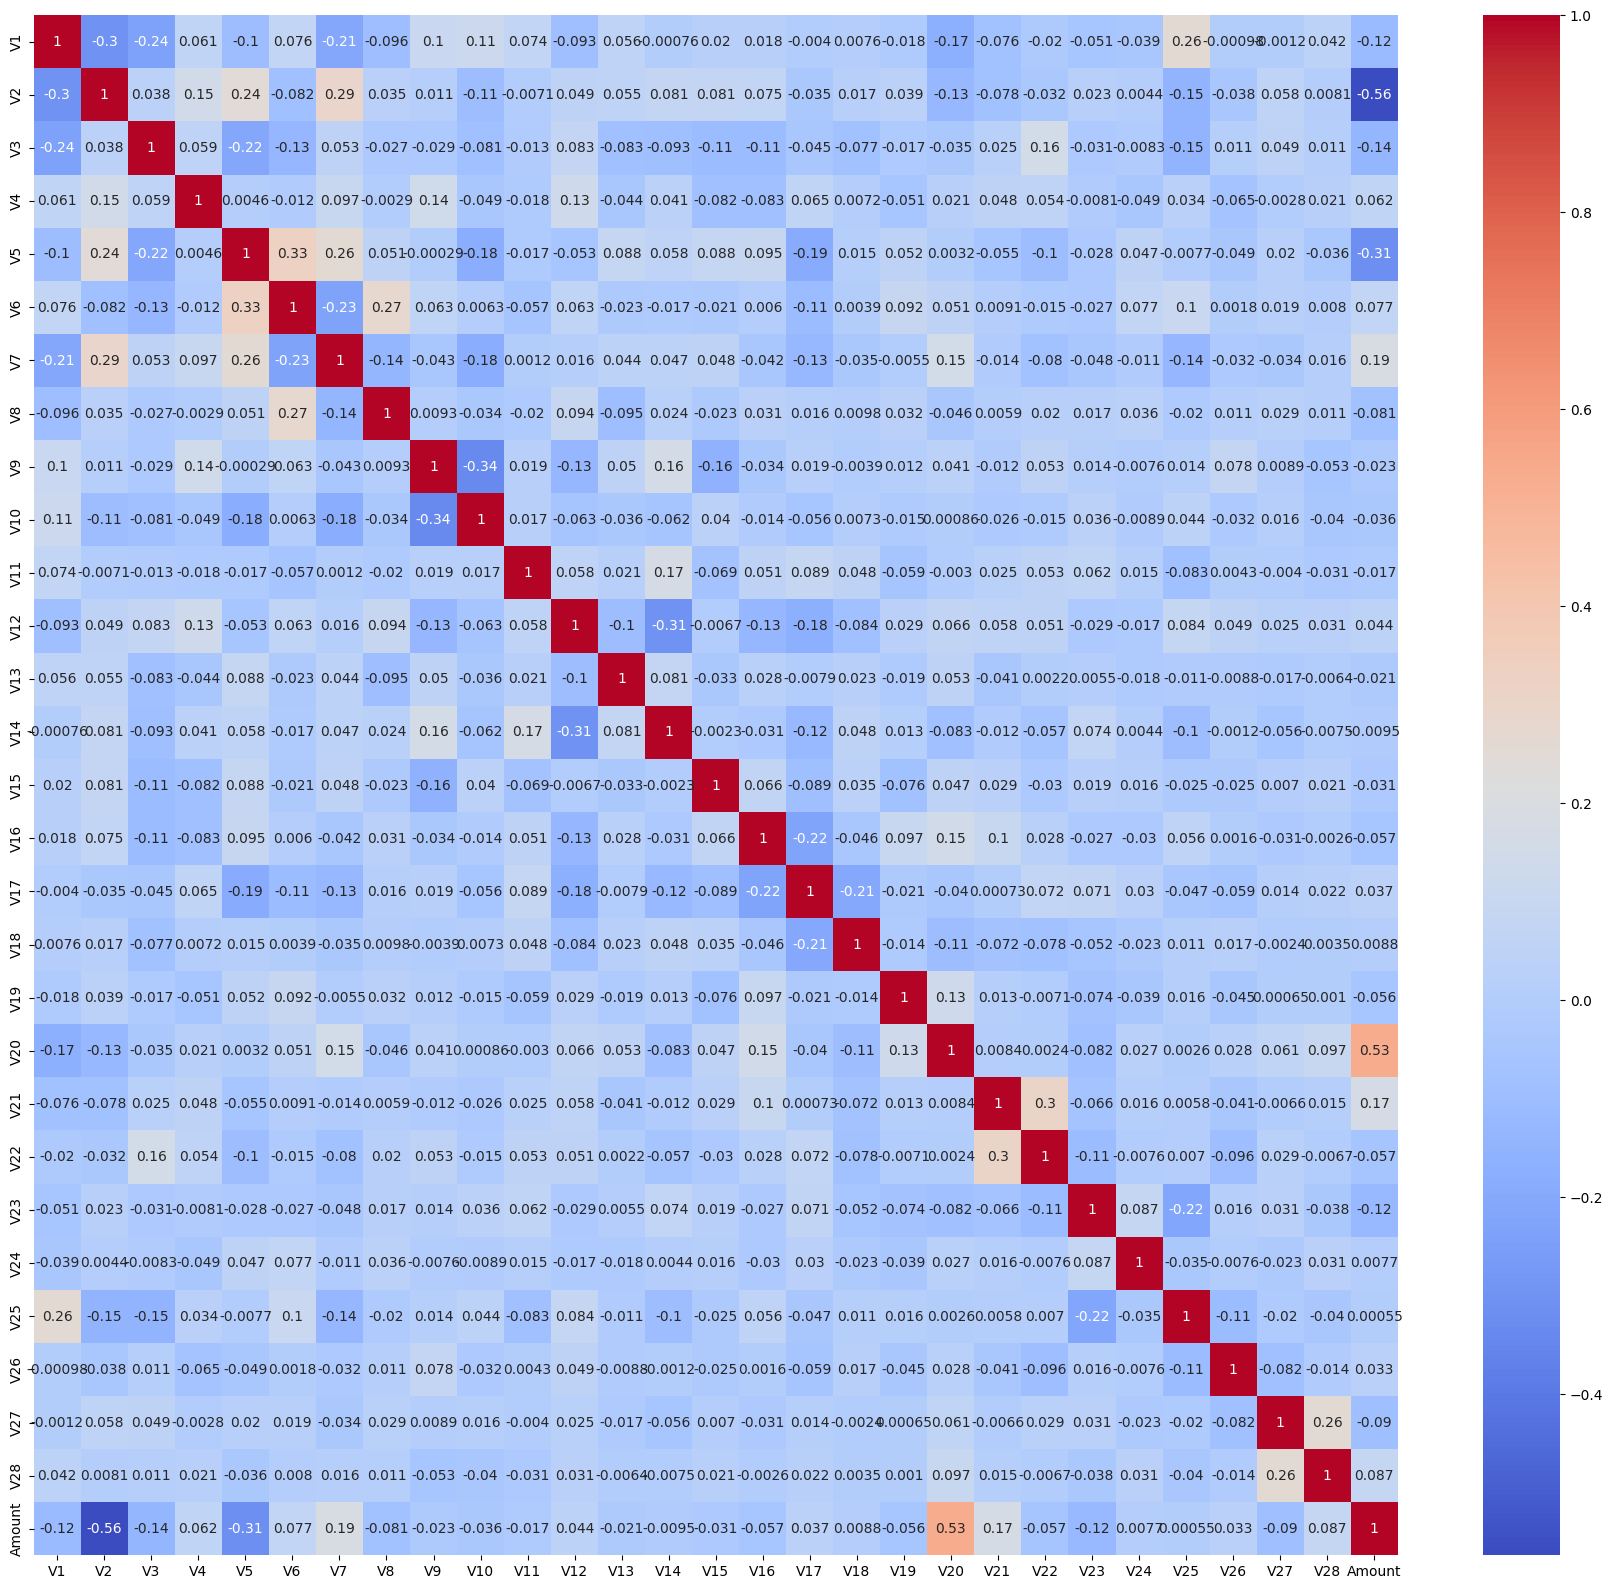

In [ ]:
correlation_matrix = x_temp.corr()
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Filtra as labels

In [ ]:
y_temp=data_train.iloc[:,31].values
y_temp

array([0, 0, 0, ..., 0, 0, 0])

Divide os dados em 20% para testes e 80%para treinamento

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_temp, y_temp,
test_size=0.2, random_state=84)

Mostra o tamanho de cada label de treinamento após a divisão dos dados

In [ ]:
frequency = Counter(y_train)
for value, count in frequency.items():
    print(f"{value} : {count} ")

0 : 174926 
1 : 377 


Aplica um pequeno undersample nos dados

In [ ]:
undersample = RandomUnderSampler(sampling_strategy=0.0022174)

In [ ]:
x_under, y_under = undersample.fit_resample(x_train, y_train)
frequency = Counter(y_under)
for value, count in frequency.items():
    print(f"{value} : {count} ")

0 : 170018 
1 : 377 


Iguala o tamanho das labels com um oversample

In [ ]:
sm = SMOTE(random_state=0)
x_resampled, y_resampled = sm.fit_resample(x_under, y_under)
frequency = Counter(y_resampled)
for value, count in frequency.items():
    print(f"{value} : {count} ")

0 : 170018 
1 : 170018 


Normaliza os dados de treinamento

In [ ]:
scaler = MinMaxScaler()
normalized_data_train = scaler.fit_transform(x_resampled)
normalized_data_train = pd.DataFrame(normalized_data_train, columns=x_temp.columns)
normalized_data_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.966037,0.720742,0.768326,0.247560,0.514717,0.644961,0.423805,0.622575,0.362367,0.597474,...,0.545986,0.407709,0.655720,0.480121,0.207788,0.619009,0.349887,0.416069,0.162962,0.000134
1,0.963601,0.737937,0.775407,0.342863,0.515754,0.598315,0.436448,0.610530,0.468658,0.565569,...,0.541981,0.387445,0.508147,0.488300,0.350073,0.584357,0.372488,0.410013,0.164211,0.001872
2,0.963402,0.723292,0.794855,0.346788,0.506149,0.614562,0.428972,0.614352,0.390258,0.597734,...,0.533112,0.385702,0.531434,0.482291,0.377725,0.621782,0.304031,0.416345,0.164815,0.004013
3,0.899651,0.738405,0.759145,0.221472,0.560314,0.687443,0.438211,0.631646,0.367859,0.573320,...,0.551145,0.393847,0.536147,0.486103,0.518725,0.582353,0.385009,0.411476,0.167350,0.000840
4,0.876255,0.760731,0.795117,0.250289,0.520143,0.611386,0.445267,0.618928,0.430015,0.621479,...,0.564965,0.393434,0.566116,0.485014,0.347363,0.555466,0.367995,0.425323,0.168438,0.001872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340031,0.971861,0.736107,0.775369,0.356744,0.516274,0.603821,0.433438,0.611073,0.491385,0.569644,...,0.540127,0.399613,0.610855,0.485036,0.361727,0.601037,0.271307,0.413953,0.163731,0.000214
340032,0.907333,0.750546,0.823900,0.351562,0.523436,0.594924,0.446445,0.609237,0.421951,0.577347,...,0.548514,0.394045,0.562732,0.486097,0.428219,0.538246,0.396171,0.393565,0.157058,0.000445
340033,0.836826,0.692604,0.667801,0.233362,0.491625,0.647361,0.441523,0.521053,0.454115,0.488366,...,0.576024,0.378244,0.639005,0.526196,0.288564,0.536709,0.286256,0.439778,0.162722,0.117718
340034,0.877934,0.784409,0.586906,0.565776,0.506374,0.598672,0.361840,0.604432,0.326157,0.461665,...,0.525483,0.455293,0.554537,0.457039,0.386841,0.584223,0.377762,0.444506,0.169372,0.000120


Normaliza os dados de teste

In [ ]:
normalized_data_test = scaler.transform(x_test)
normalized_data_test = pd.DataFrame(normalized_data_test, columns=x_temp.columns)
normalized_data_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.886677,0.748403,0.829166,0.236486,0.525547,0.627349,0.444705,0.623039,0.443743,0.552574,...,0.539390,0.397353,0.592480,0.478461,0.337659,0.568868,0.538571,0.417393,0.165180,0.001338
1,0.861331,0.769276,0.823576,0.292100,0.520049,0.614705,0.448617,0.605747,0.459837,0.645032,...,0.585078,0.387069,0.558326,0.478219,0.352858,0.568220,0.401898,0.419001,0.151136,0.000801
2,0.898811,0.744121,0.838401,0.365143,0.524809,0.616625,0.442928,0.619097,0.364700,0.585313,...,0.557021,0.395153,0.565648,0.484287,0.410461,0.542513,0.274238,0.428821,0.169239,0.002847
3,0.990986,0.717972,0.723042,0.247875,0.512953,0.610212,0.424850,0.611151,0.442253,0.596220,...,0.547810,0.408704,0.663318,0.484555,0.476076,0.576720,0.351423,0.410698,0.161401,0.004007
4,0.964351,0.723156,0.760899,0.267570,0.506823,0.590781,0.429645,0.610421,0.362903,0.589587,...,0.553118,0.407389,0.635412,0.481902,0.428046,0.622521,0.330783,0.414374,0.165385,0.006019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43821,0.967895,0.717052,0.740328,0.197273,0.531780,0.701189,0.416688,0.632173,0.384228,0.594911,...,0.555109,0.406479,0.627820,0.476562,0.524620,0.657705,0.345467,0.414857,0.164315,0.004007
43822,0.960302,0.727253,0.777503,0.272181,0.514673,0.604535,0.436231,0.611355,0.434730,0.553999,...,0.547603,0.400727,0.613531,0.478548,0.416099,0.607079,0.690085,0.408047,0.163933,0.006689
43823,0.906218,0.754879,0.753826,0.335089,0.538639,0.586636,0.457047,0.610459,0.350931,0.559426,...,0.547938,0.404239,0.611280,0.479397,0.435548,0.526522,0.257356,0.420452,0.171032,0.005346
43824,0.962559,0.721867,0.748252,0.244810,0.538529,0.705358,0.422157,0.635127,0.442507,0.571022,...,0.550770,0.393585,0.543984,0.485053,0.525653,0.599975,0.534771,0.410706,0.164029,0.003959


**KNN**

Define como os hiperparâmetros irão variar na validação do KNN

n_neighbors: número de vizinhos mais próximos

metric: tipo de distância usada

In [ ]:
parameters_KNN = {'n_neighbors':[1,3,5,10,20], 'metric':['euclidean']}

Instancia o classificador

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
grid1 = GridSearchCV(KNN, parameters_KNN)

Cria o pipeline de execução

In [ ]:
clf1 = make_pipeline(grid1)

Treina o modelo

In [ ]:
clf1.fit(normalized_data_train,y_resampled)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid={'metric': ['euclidean'],
                                          'n_neighbors': [1, 3, 5, 10, 20]}))])

Retorna quais foram os melhores hiperparâmetros na validação

In [ ]:
grid1.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

Cria um modelo com os melhores hiperparâmetros



In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

Treina o modelo

In [ ]:
modelKNN.fit(normalized_data_train,y_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

Mostra a ACC do modelo. Obteve um ACC alta, porém o conjunto de teste estão muito desbalanceado.

In [ ]:
score = modelKNN.score(normalized_data_test, y_test)
print("accuracy=%.2f%%" % (score * 100))

accuracy=98.98%


Dá pra ver como o desbalanceamento afeta na ACC pela matriz de confusão

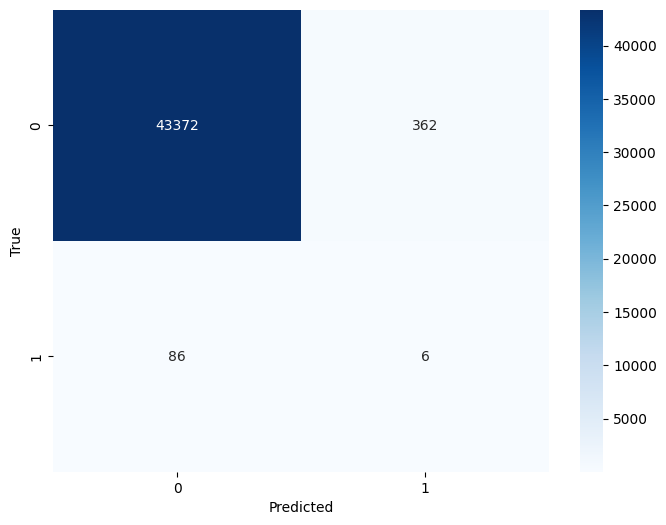

In [ ]:
y_pred = modelKNN.predict(normalized_data_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

A curva ROC mostra como modelo está péssimo em predizer as fraudes

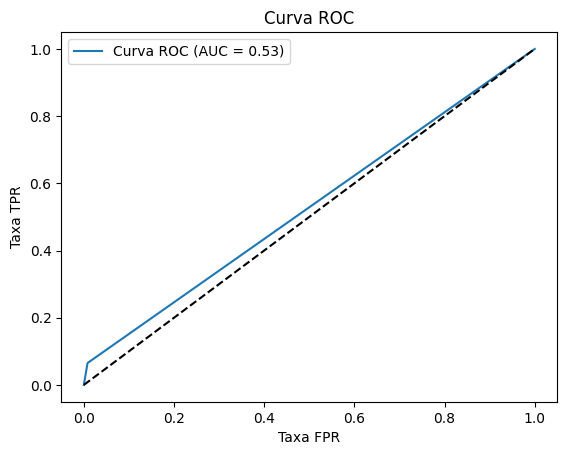

In [ ]:
probs = modelKNN.predict_proba(normalized_data_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
a = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

Mostra o valor das métricas de precisão, recall e F1.

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))


precision, recall, _ = precision_recall_curve(y_test, y_pred)

Precisão: 0.02
Recall: 0.07
F1: 0.03


**Perceptron**

Define como os hiperparâmetros irão variar na validação do perceptron

tol: Critério de parada de validação

n_iter_no_change: Número de interações sem mudança na pontuação para parar a validação

max_iter: número máximo de interações

early_stopping: ativar a parada para não mudança de pontuação

In [ ]:
parameters_PERC = {'tol':[1e-3], 'random_state':[0], 'n_iter_no_change':[1,3,5,7,9], 'early_stopping':[1], 'max_iter':[1000,2000]}

Instancia o classificador

In [ ]:
PERC = Perceptron()

In [ ]:
grid2 = GridSearchCV(PERC, parameters_PERC)

Cria o pipeline de execução

In [ ]:
clf2 = make_pipeline(grid2)

Treina o modelo

In [ ]:
clf2.fit(normalized_data_train,y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarnin

Retorna quais foram os melhores hiperparâmetros na validação

In [ ]:
grid2.best_params_

{'early_stopping': 1,
 'max_iter': 1000,
 'n_iter_no_change': 3,
 'random_state': 0,
 'tol': 0.001}

Cria um modelo com os melhores hiperparâmetros


In [ ]:
modelPERC = Perceptron(tol=1e-3, random_state=0, n_iter_no_change=3, early_stopping=1, max_iter=1000)

Treina o modelo

In [ ]:
modelPERC.fit(normalized_data_train,y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Perceptron(early_stopping=1, n_iter_no_change=3)

Mostra a ACC do modelo. Obteve um valor menor que o KNN

In [ ]:
y_pred = modelPERC.predict(normalized_data_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy=%.2f%%" % (accuracy * 100))

accuracy=81.89%


Porém, mais instâncias de fraude foram classificadas corretamente

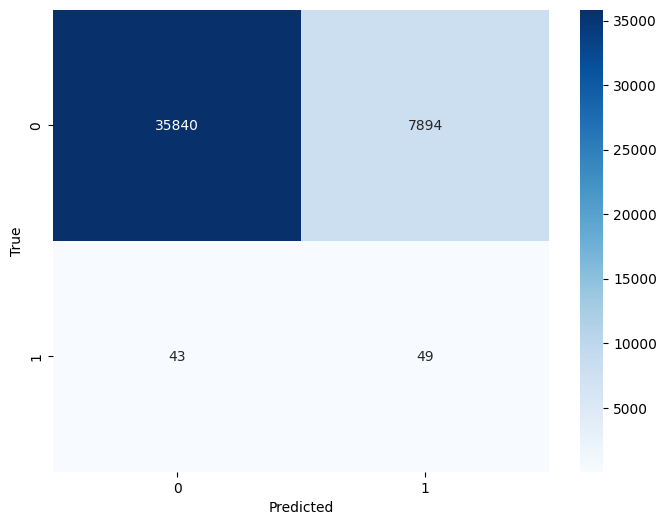

In [ ]:
y_pred = modelPERC.predict(normalized_data_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

A curva ROC também foi melhor, pois o modelo é melhor em classificar fraudes

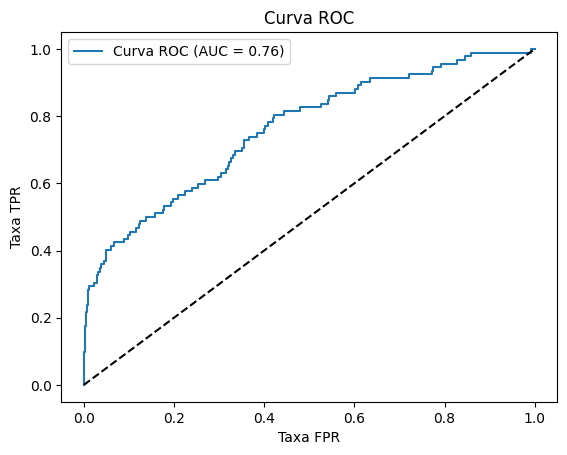

In [ ]:
probs = modelPERC.decision_function(normalized_data_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
a = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

Mostra as outras métricas

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

Precisão: 0.01
Recall: 0.53
F1: 0.01


**Decision Tree**

Define como os hiperparâmetros irão variar na validação do DecisionTree

max_depth: profundidade máxima da árvore

criterion: função para medir a qualidade de uma divisão

splitter: estrátegia para a divisão em cada nó

min_samples_split: o número mínimo de amostras para dividir um nó

In [ ]:
parameters_TREE = {'max_depth':[3,5,7,9,11], 'random_state':[42], 'criterion':['gini','entropy','log_loss'], 'splitter':['best'],'min_samples_split':[2,4,6]}

Instancia o classificador

In [ ]:
TREE = DecisionTreeClassifier()

In [ ]:
grid3 = GridSearchCV(TREE, parameters_TREE)

Cria o pipeline de execução

In [ ]:
clf3 = make_pipeline(grid3)

Treina o modelo

In [ ]:
clf3.fit(normalized_data_train,y_resampled)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy',
                                                        'log_loss'],
                                          'max_depth': [3, 5, 7, 9, 11],
                                          'min_samples_split': [2, 4, 6],
                                          'random_state': [42],
                                          'splitter': ['best']}))])

Retorna quais foram os melhores hiperparâmetros na validação

In [ ]:
grid3.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_split': 4,
 'random_state': 42,
 'splitter': 'best'}

Cria um modelo com os melhores hiperparâmetros


In [ ]:
modelTREE = DecisionTreeClassifier(max_depth=11, random_state=42, criterion = 'gini', splitter='best', min_samples_split=4)

Treina o modelo

In [ ]:
modelTREE.fit(normalized_data_train,y_resampled)

DecisionTreeClassifier(max_depth=11, min_samples_split=4, random_state=42)

Mostra a ACC do modelo. Um valor parecido com o perceptron.

In [ ]:
y_pred = modelTREE.predict(normalized_data_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy=%.2f%%" % (accuracy * 100))

accuracy=83.54%


Porém, a classificação foi pior que o perceptron

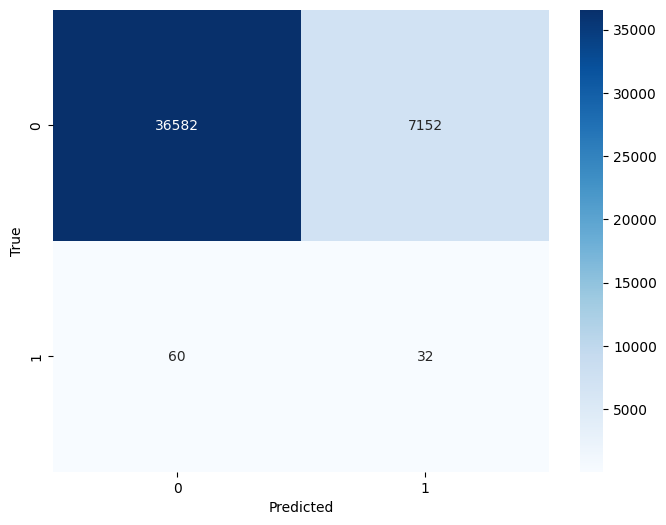

In [ ]:
y_pred = modelTREE.predict(normalized_data_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

A curva ROC também foi pior

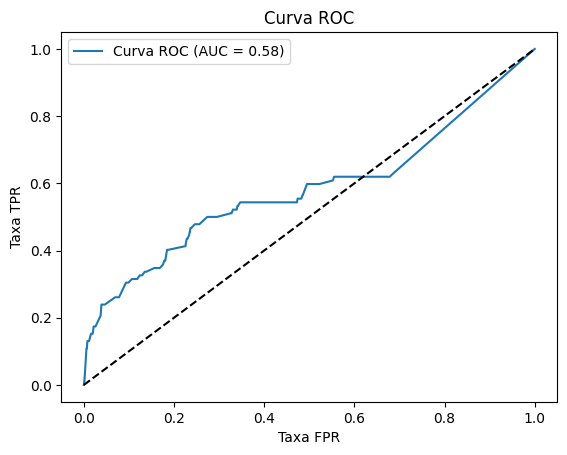

In [ ]:
probs = modelTREE.predict_proba(normalized_data_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
a = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

Mostra outras métricas

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

Precisão: 0.00
Recall: 0.35
F1: 0.01


**FNN**

Instancia o modelo
Cria um callback para early stopping para 4 epochs sem mudança na loss

In [ ]:
FNN = Sequential()
callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0.0005,
    patience=4,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

Divide o conjunto de dados para validação

In [ ]:
x_train_resampled,x_val,y_train_resampled,y_val=train_test_split(normalized_data_train, y_resampled,
test_size=0.1, random_state=84)

Parâmetros que irão variar

Hidden: número de camadas ocultas
Hidden_size: tamanho das camdas ocultas

In [ ]:
hidden = [1,2,3]
hidden_size = [16,32]
AU = []

Treina modelos de NN e valida

Mostra os gráficos de acc e loss ao decorrer das epochs

1063/1063 [==============================] - 2s 2ms/step


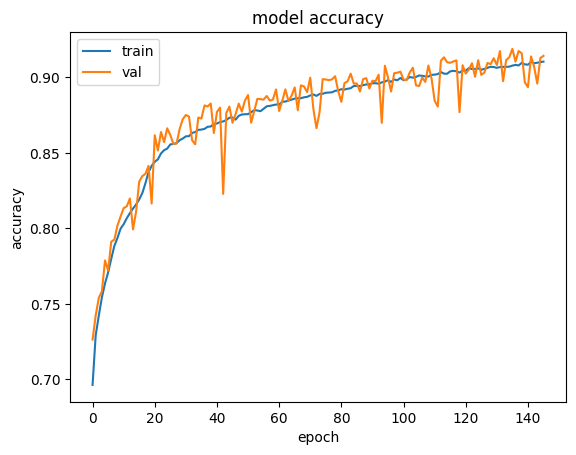

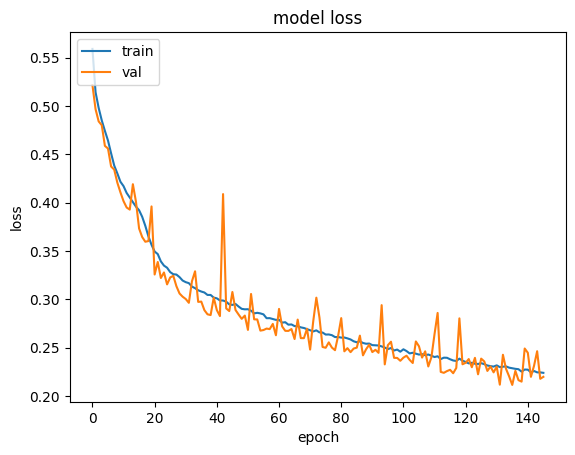

685/685 [==============================] - 1s 2ms/step - loss: 25.5716 - accuracy: 0.9973
test loss, test acc: [25.571552276611328, 0.997307538986206]
1063/1063 [==============================] - 2s 2ms/step


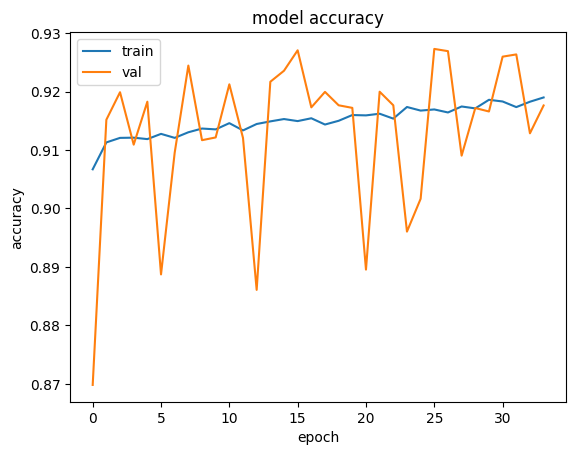

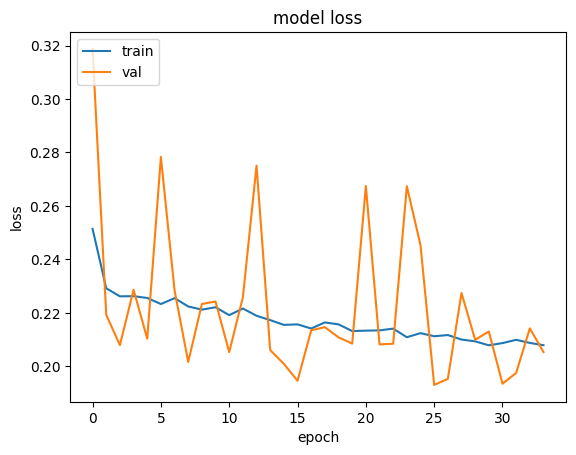

685/685 [==============================] - 1s 2ms/step - loss: 0.0185 - accuracy: 0.9970
test loss, test acc: [0.018470901995897293, 0.9970337152481079]
1063/1063 [==============================] - 2s 2ms/step


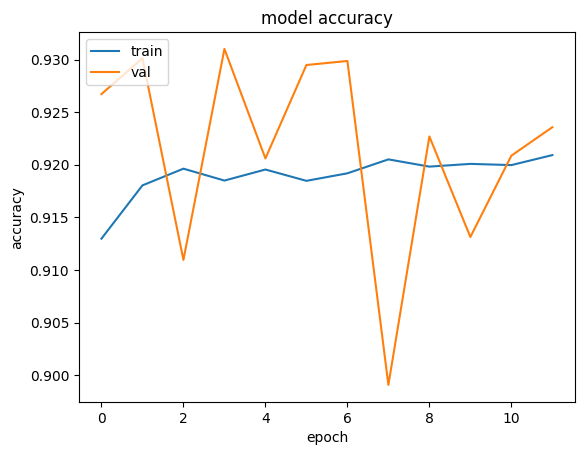

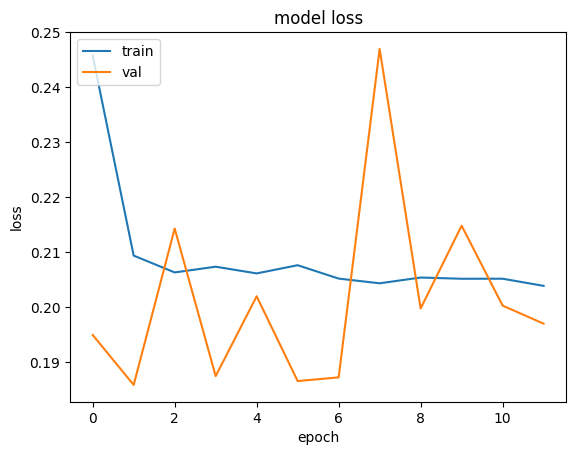

685/685 [==============================] - 2s 2ms/step - loss: 0.0185 - accuracy: 0.9971
test loss, test acc: [0.01848924532532692, 0.9970565438270569]
1063/1063 [==============================] - 3s 3ms/step


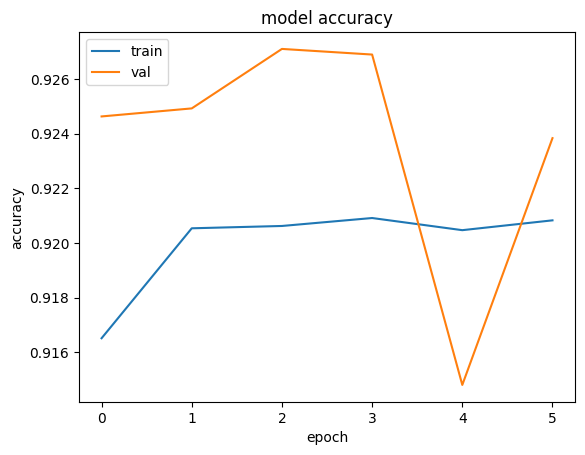

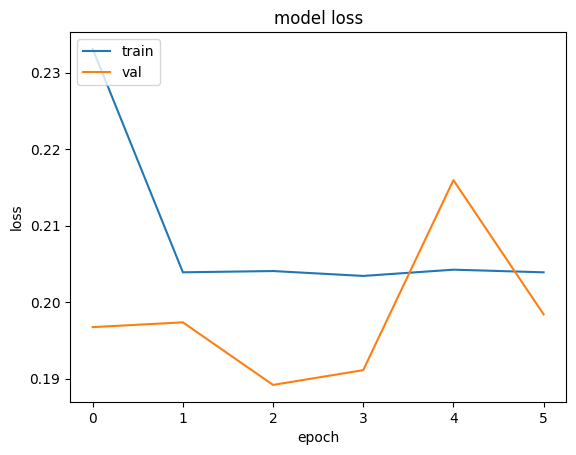

685/685 [==============================] - 2s 3ms/step - loss: 0.0173 - accuracy: 0.9974
test loss, test acc: [0.017289990559220314, 0.997353196144104]
1063/1063 [==============================] - 2s 2ms/step


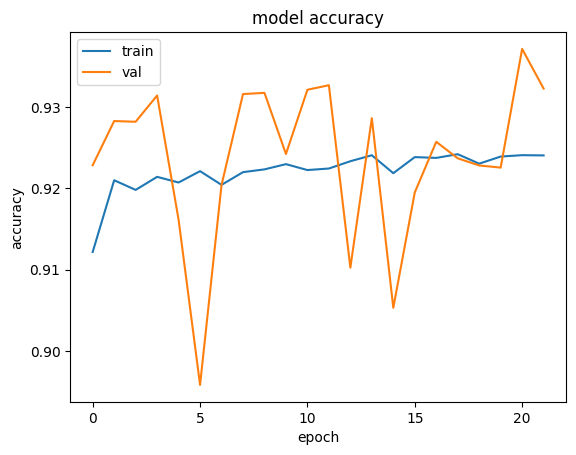

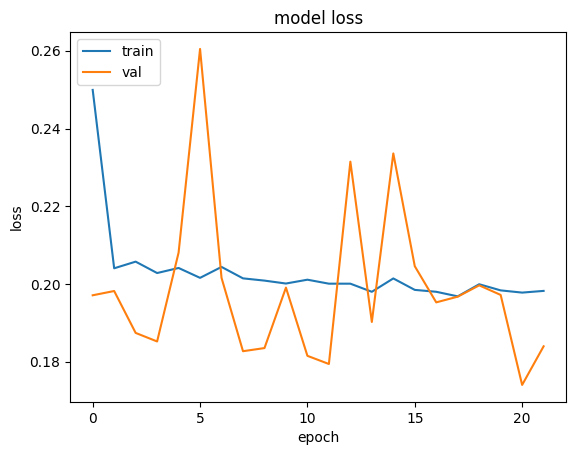

685/685 [==============================] - 2s 4ms/step - loss: 0.0166 - accuracy: 0.9975
test loss, test acc: [0.01658312790095806, 0.9975128769874573]
1063/1063 [==============================] - 3s 2ms/step


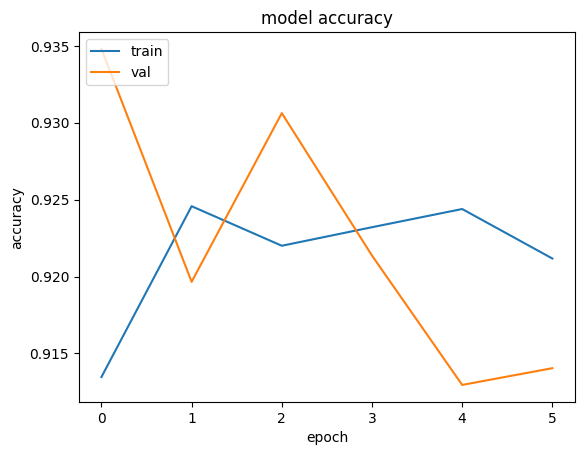

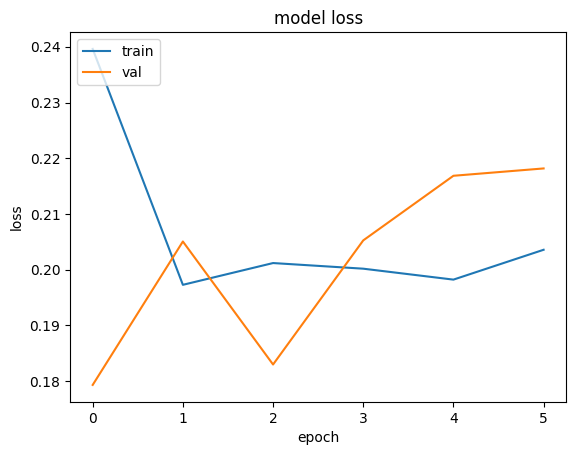

685/685 [==============================] - 2s 3ms/step - loss: 0.0159 - accuracy: 0.9976
test loss, test acc: [0.015925277024507523, 0.9976269602775574]


In [ ]:
for h in hidden:
  for hs in hidden_size:
    for ah in hidden:
      FNN.add(Dense(hs, activation='relu'))
    FNN.add(Dense(1,  activation="sigmoid"))
    FNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
    history = FNN.fit(x_train_resampled, y_train_resampled, epochs=2000, batch_size=200, validation_data=(x_val, y_val), callbacks=[callback], verbose =0)
    y_pred = FNN.predict(x_val)
    y_pred_binary = (y_pred > 0.5).astype(int)
    a = roc_auc_score(y_val, y_pred_binary)
    AU.append(a)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    results = FNN.evaluate(x_test, y_test, batch_size=64)
    print("test loss, test acc:", results)

Mostra a AUC dos modelos

In [ ]:
AU

[0.9142234010930967,
 0.9175724960597301,
 0.9233913830281347,
 0.9237203155811048,
 0.9320769076042654,
 0.9140134106536814]

Cria um modelo, baseado no modelo com melhor AUC

In [ ]:
model1FNN = tf.keras.models.Sequential()

In [ ]:
model1FNN.add(Dense(16, activation='relu'))
model1FNN.add(Dense(16, activation='relu'))
model1FNN.add(Dense(16, activation='relu'))
model1FNN.add(Dense(1,  activation="sigmoid"))

In [ ]:
model1FNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

Treina o modelo com o dataset com oversample

In [ ]:
model1FNN.fit(normalized_data_train, y_resampled, epochs=2000, batch_size=200, callbacks=[callback],verbose =0)

Mostra a acc do modelo

In [ ]:
y_pred = model1FNN.predict(normalized_data_test)
y_pred_binary = (y_pred > 0.5).astype(int)

1370/1370 [==============================] - 2s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("accuracy=%.2f%%" % (accuracy * 100))

accuracy=84.70%


Plota a matriz de confusão do modelo

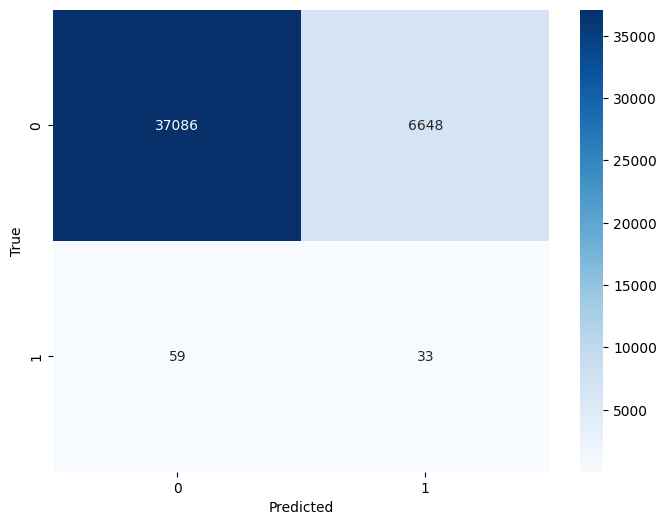

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Mostra a curva ROC

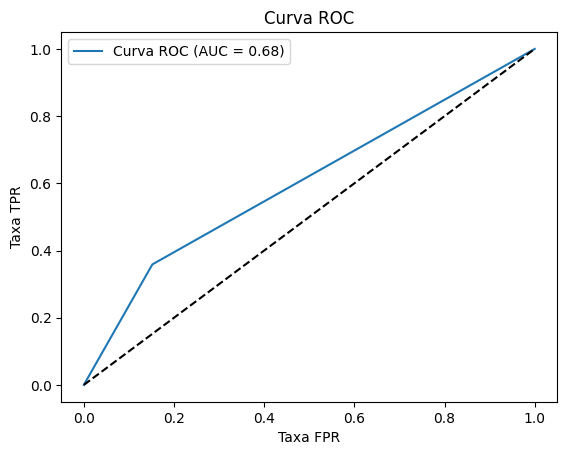

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
a = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

Mostra outras métricas

In [ ]:
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

Precisão: 0.00
Recall: 0.36
F1: 0.01


Normaliza o dataset original

In [ ]:
scaler = MinMaxScaler()
normalized_data_train1 = scaler.fit_transform(x_train)
normalized_data_train1 = pd.DataFrame(normalized_data_train1, columns=x_temp.columns)
normalized_data_train1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.890677,0.746096,0.841923,0.461288,0.541563,0.628071,0.444854,0.614781,0.332981,0.610477,...,0.546726,0.402687,0.642733,0.474391,0.392627,0.573079,0.355682,0.416090,0.159799,0.000000
1,0.880534,0.744868,0.842847,0.254074,0.506453,0.601618,0.431150,0.628953,0.407054,0.545930,...,0.548450,0.400181,0.595668,0.479395,0.444435,0.576137,0.536512,0.420229,0.165534,0.000314
2,0.917708,0.706246,0.781603,0.174080,0.516556,0.601711,0.438355,0.609469,0.318206,0.600974,...,0.554023,0.404969,0.639855,0.491538,0.465096,0.593863,0.345267,0.409282,0.161357,0.024080
3,0.933928,0.747087,0.725705,0.252001,0.537213,0.613879,0.451021,0.613176,0.397734,0.560704,...,0.545507,0.397375,0.575712,0.478021,0.320349,0.553524,0.447328,0.412549,0.163219,0.001070
4,0.884112,0.724520,0.819335,0.185491,0.521364,0.608044,0.448815,0.604420,0.323946,0.597223,...,0.547098,0.398347,0.587758,0.477129,0.338253,0.641921,0.337257,0.405365,0.161315,0.016040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175298,0.891069,0.746639,0.799743,0.150953,0.515541,0.569685,0.448060,0.614879,0.425448,0.535386,...,0.549931,0.397928,0.580227,0.484443,0.482646,0.553982,0.272731,0.425358,0.170143,0.001513
175299,0.917267,0.751250,0.822499,0.467107,0.525464,0.610840,0.447924,0.610924,0.312398,0.608006,...,0.552144,0.399735,0.596793,0.483339,0.434908,0.485341,0.399582,0.408277,0.158484,0.000199
175300,0.957553,0.723775,0.806724,0.311178,0.505164,0.603610,0.430330,0.612087,0.545133,0.540537,...,0.547612,0.392571,0.572678,0.481549,0.435022,0.639990,0.241618,0.415966,0.164983,0.010178
175301,0.953633,0.724109,0.822024,0.383620,0.504350,0.629782,0.425843,0.618922,0.464290,0.571693,...,0.550185,0.403035,0.604908,0.478108,0.377705,0.618443,0.309964,0.417364,0.165533,0.013244


Normaliza o conjunto de teste

In [ ]:
normalized_data_test1 = scaler.transform(x_test)
normalized_data_test1 = pd.DataFrame(normalized_data_test1, columns=x_temp.columns)
normalized_data_test1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.886677,0.748403,0.829166,0.236486,0.525547,0.627349,0.444705,0.623039,0.443743,0.552574,...,0.539390,0.397353,0.592480,0.478461,0.337659,0.568868,0.538571,0.417393,0.165180,0.001338
1,0.861331,0.769276,0.823576,0.292100,0.520049,0.614705,0.448617,0.605747,0.459837,0.645032,...,0.585078,0.387069,0.558326,0.478219,0.352858,0.568220,0.401898,0.419001,0.151136,0.000801
2,0.898811,0.744121,0.838401,0.365143,0.524809,0.616625,0.442928,0.619097,0.364700,0.585313,...,0.557021,0.395153,0.565648,0.484287,0.410461,0.542513,0.274238,0.428821,0.169239,0.002847
3,0.990986,0.717972,0.723042,0.247875,0.512953,0.610212,0.424850,0.611151,0.442253,0.596220,...,0.547810,0.408704,0.663318,0.484555,0.476076,0.576720,0.351423,0.410698,0.161401,0.004007
4,0.964351,0.723156,0.760899,0.267570,0.506823,0.590781,0.429645,0.610421,0.362903,0.589587,...,0.553118,0.407389,0.635412,0.481902,0.428046,0.622521,0.330783,0.414374,0.165385,0.006019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43821,0.967895,0.717052,0.740328,0.197273,0.531780,0.701189,0.416688,0.632173,0.384228,0.594911,...,0.555109,0.406479,0.627820,0.476562,0.524620,0.657705,0.345467,0.414857,0.164315,0.004007
43822,0.960302,0.727253,0.777503,0.272181,0.514673,0.604535,0.436231,0.611355,0.434730,0.553999,...,0.547603,0.400727,0.613531,0.478548,0.416099,0.607079,0.690085,0.408047,0.163933,0.006689
43823,0.906218,0.754879,0.753826,0.335089,0.538639,0.586636,0.457047,0.610459,0.350931,0.559426,...,0.547938,0.404239,0.611280,0.479397,0.435548,0.526522,0.257356,0.420452,0.171032,0.005346
43824,0.962559,0.721867,0.748252,0.244810,0.538529,0.705358,0.422157,0.635127,0.442507,0.571022,...,0.550770,0.393585,0.543984,0.485053,0.525653,0.599975,0.534771,0.410706,0.164029,0.003959


Cria um modelo

In [ ]:
model1FNN = tf.keras.models.Sequential()

In [ ]:
model1FNN.add(Dense(16, activation='relu'))
model1FNN.add(Dense(16, activation='relu'))
model1FNN.add(Dense(16, activation='relu'))
model1FNN.add(Dense(1,  activation="sigmoid"))

In [ ]:
model1FNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

Treina o modelo com o dataset original e com peso

In [ ]:
model1FNN.fit(normalized_data_train1, y_train, epochs=2000, batch_size=200, callbacks=[callback],class_weight={0: 6, 1: 2400} ,verbose =0)

Mostra a acc do modelo

In [ ]:
y_pred = model1FNN.predict(normalized_data_test1)
y_pred_binary = (y_pred > 0.5).astype(int)

1370/1370 [==============================] - 3s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("accuracy=%.2f%%" % (accuracy * 100))

accuracy=79.56%


Mostra a matriz de confusão do modelo. Melhor em classificar fraudes

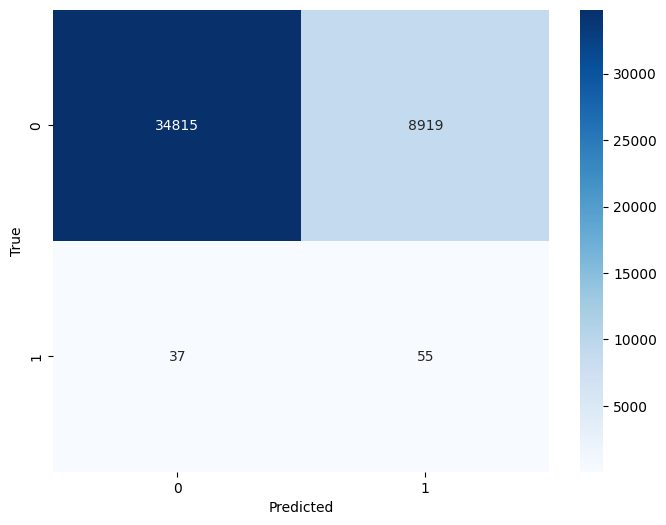

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

A curva ROC também melhorou

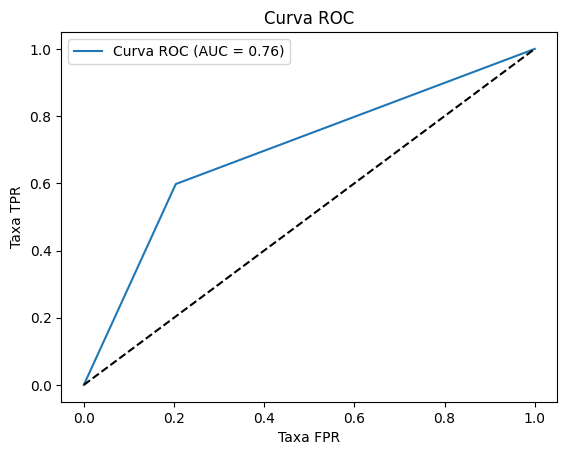

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
a = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

Mostra outras métricas

In [ ]:
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

Precisão: 0.01
Recall: 0.60
F1: 0.01


Faz um undersample para 50000 na label 0 e um oversample depois

In [ ]:
undersample = RandomUnderSampler(sampling_strategy=0.00754)

In [ ]:
x_under1, y_under1 = undersample.fit_resample(x_train, y_train)
frequency = Counter(y_under1)
for value, count in frequency.items():
    print(f"{value} : {count} ")

0 : 50000 
1 : 377 


In [ ]:
sm = SMOTE(random_state=0)
x_resampled1, y_resampled1 = sm.fit_resample(x_under1, y_under1)
frequency = Counter(y_resampled1)
for value, count in frequency.items():
    print(f"{value} : {count} ")

0 : 50000 
1 : 50000 


Normaliza os dados do undersample

In [ ]:
scaler = MinMaxScaler()
normalized_data_train2 = scaler.fit_transform(x_under1)
normalized_data_train2 = pd.DataFrame(normalized_data_train2, columns=x_temp.columns)
normalized_data_train2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.881048,0.800314,0.812979,0.378364,0.730543,0.734989,0.594443,0.589654,0.486321,0.702281,...,0.575972,0.435722,0.485425,0.481407,0.486975,0.628870,0.450967,0.528834,0.131213,0.000734
1,0.822506,0.806055,0.795408,0.204394,0.577342,0.459406,0.537030,0.507537,0.266842,0.664440,...,0.551291,0.469472,0.553746,0.487838,0.431563,0.631170,0.294568,0.590540,0.158118,0.001338
2,0.976578,0.780132,0.823545,0.657310,0.605816,0.490573,0.575821,0.588503,0.377095,0.684653,...,0.542616,0.479490,0.629852,0.488116,0.405269,0.592483,0.401486,0.587360,0.159577,0.008718
3,0.884886,0.790647,0.882207,0.386405,0.619482,0.493266,0.602070,0.595848,0.341726,0.625003,...,0.552094,0.468098,0.555441,0.492133,0.432552,0.527583,0.410539,0.589688,0.162072,0.009619
4,0.943437,0.763456,0.865729,0.381801,0.581576,0.533560,0.559066,0.600472,0.432975,0.634579,...,0.551601,0.471893,0.578532,0.481036,0.356173,0.625361,0.586132,0.585826,0.161502,0.018729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50372,0.683976,0.829535,0.785981,0.368455,0.530570,0.494423,0.527224,0.683123,0.410702,0.576487,...,0.494619,0.492100,0.648024,0.504128,0.388330,0.674073,0.266830,0.479775,0.146409,0.000102
50373,0.866126,0.808598,0.787585,0.366583,0.662473,0.441926,0.575778,0.517407,0.383124,0.605110,...,0.555550,0.431464,0.624235,0.482738,0.344134,0.623108,0.213731,0.596275,0.161450,0.000134
50374,0.866897,0.778110,0.931296,0.465304,0.621158,0.503391,0.567766,0.600315,0.416070,0.631046,...,0.551324,0.477417,0.630281,0.475613,0.434657,0.682576,0.364151,0.592567,0.167347,0.002095
50375,0.952817,0.786754,0.862709,0.573442,0.602113,0.446344,0.579827,0.584702,0.426155,0.646537,...,0.541269,0.471622,0.600753,0.486391,0.518945,0.680623,0.383216,0.586038,0.161074,0.000099


Normaliza os dados de teste

In [ ]:
normalized_data_test2 = scaler.transform(x_test)
normalized_data_test2 = pd.DataFrame(normalized_data_test2, columns=x_temp.columns)
normalized_data_test2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.861344,0.792992,0.899818,0.298948,0.627799,0.536574,0.589211,0.603549,0.443743,0.606924,...,0.539390,0.468917,0.592480,0.478461,0.347475,0.630457,0.582004,0.594690,0.162240,0.001338
1,0.830080,0.815109,0.893566,0.369251,0.613859,0.504975,0.596560,0.582541,0.459837,0.708476,...,0.585078,0.456781,0.558326,0.478219,0.363623,0.629738,0.434309,0.596981,0.148146,0.000801
2,0.876311,0.788456,0.910145,0.461586,0.625928,0.509772,0.585874,0.598760,0.364700,0.642883,...,0.557021,0.466321,0.565648,0.484287,0.424822,0.601248,0.296354,0.610972,0.166313,0.002847
3,0.990005,0.760748,0.781144,0.313345,0.595867,0.493745,0.551916,0.589106,0.442253,0.654863,...,0.547810,0.482312,0.663318,0.484555,0.494534,0.639159,0.379764,0.585151,0.158448,0.004007
4,0.957152,0.766242,0.823477,0.338242,0.580327,0.445183,0.560922,0.588219,0.362903,0.647577,...,0.553118,0.480760,0.635412,0.481902,0.443505,0.689918,0.357458,0.590389,0.162446,0.006019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43821,0.961523,0.759773,0.800474,0.249377,0.643602,0.721115,0.536585,0.614644,0.384228,0.653425,...,0.555109,0.479687,0.627820,0.476562,0.546108,0.728911,0.373327,0.591077,0.161371,0.004007
43822,0.952158,0.770582,0.842045,0.344070,0.600228,0.479557,0.573293,0.589354,0.434730,0.608490,...,0.547603,0.472899,0.613531,0.478548,0.430812,0.672804,0.745736,0.581374,0.160988,0.006689
43823,0.885447,0.799854,0.815568,0.423594,0.660991,0.434825,0.612395,0.588266,0.350931,0.614450,...,0.547938,0.477043,0.611280,0.479397,0.451475,0.583526,0.278111,0.599049,0.168112,0.005346
43824,0.954941,0.764875,0.809334,0.309470,0.660713,0.731534,0.546857,0.618233,0.442507,0.627186,...,0.550770,0.464470,0.543984,0.485053,0.547205,0.664932,0.577898,0.585162,0.161085,0.003959


Cria um modelo

In [ ]:
model3FNN = tf.keras.models.Sequential()

In [ ]:
model3FNN.add(Dense(16, activation='relu'))
model3FNN.add(Dense(16, activation='relu'))
model3FNN.add(Dense(16, activation='relu'))
model3FNN.add(Dense(1,  activation="sigmoid"))

In [ ]:
model3FNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

Treina o modelo com dados de undersample e com peso

In [ ]:
model3FNN.fit(normalized_data_train2, y_under1, epochs=2000, batch_size=100, callbacks=[callback],class_weight={0: 1, 1: 150} ,verbose =0)

Mostra a acc

In [ ]:
y_pred = model3FNN.predict(normalized_data_test2)
y_pred_binary = (y_pred > 0.5).astype(int)

1370/1370 [==============================] - 3s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("accuracy=%.2f%%" % (accuracy * 100))

accuracy=65.75%


O modelo prediz mais fraudes, mas clissifica muitas não fraudes como fraudes

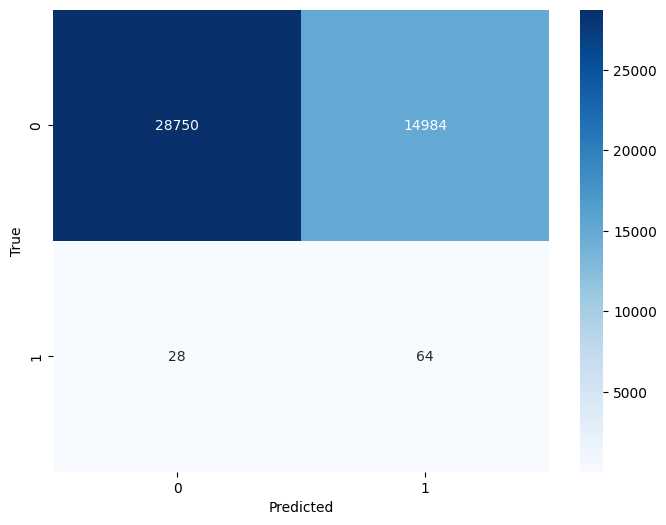

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Mostra a curva ROC

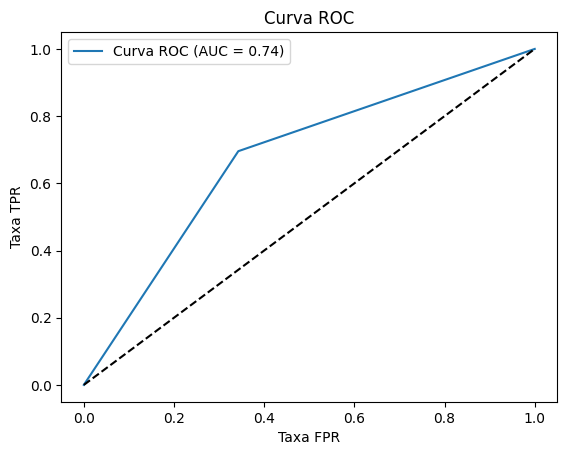

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
a = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

Mostra outras métricas

In [ ]:
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

Precisão: 0.00
Recall: 0.70
F1: 0.01


Normaliza os dados de oversample

In [ ]:
scaler = MinMaxScaler()
normalized_data_train3 = scaler.fit_transform(x_resampled1)
normalized_data_train3 = pd.DataFrame(normalized_data_train3, columns=x_temp.columns)
normalized_data_train3

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.881048,0.800314,0.812979,0.378364,0.730543,0.734989,0.594443,0.589654,0.486321,0.702281,...,0.575972,0.435722,0.485425,0.481407,0.486975,0.628870,0.450967,0.528834,0.131213,0.000734
1,0.822506,0.806055,0.795408,0.204394,0.577342,0.459406,0.537030,0.507537,0.266842,0.664440,...,0.551291,0.469472,0.553746,0.487838,0.431563,0.631170,0.294568,0.590540,0.158118,0.001338
2,0.976578,0.780132,0.823545,0.657310,0.605816,0.490573,0.575821,0.588503,0.377095,0.684653,...,0.542616,0.479490,0.629852,0.488116,0.405269,0.592483,0.401486,0.587360,0.159577,0.008718
3,0.884886,0.790647,0.882207,0.386405,0.619482,0.493266,0.602070,0.595848,0.341726,0.625003,...,0.552094,0.468098,0.555441,0.492133,0.432552,0.527583,0.410539,0.589688,0.162072,0.009619
4,0.943437,0.763456,0.865729,0.381801,0.581576,0.533560,0.559066,0.600472,0.432975,0.634579,...,0.551601,0.471893,0.578532,0.481036,0.356173,0.625361,0.586132,0.585826,0.161502,0.018729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.831454,0.799968,0.912867,0.435695,0.604971,0.503154,0.583466,0.589234,0.427452,0.672701,...,0.562127,0.465803,0.600818,0.488908,0.406973,0.573999,0.330909,0.597377,0.162979,0.000104
99996,0.986512,0.772653,0.782031,0.352088,0.616528,0.485578,0.566598,0.589945,0.512447,0.622905,...,0.539142,0.472883,0.619909,0.485305,0.379230,0.646706,0.252776,0.588500,0.158096,0.000164
99997,0.932564,0.770356,0.838064,0.425675,0.585989,0.459885,0.574205,0.575034,0.408084,0.625371,...,0.555931,0.469394,0.616733,0.470356,0.458652,0.702263,0.378104,0.589056,0.163803,0.025019
99998,0.830625,0.732894,0.794211,0.495177,0.563422,0.497109,0.638673,0.592926,0.340230,0.618364,...,0.603043,0.502063,0.581088,0.496495,0.451842,0.693417,0.365569,0.572157,0.166114,0.108283


Normaliza os dados de teste

In [ ]:
normalized_data_test3 = scaler.transform(x_test)
normalized_data_test3 = pd.DataFrame(normalized_data_test3, columns=x_temp.columns)
normalized_data_test3

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.861344,0.792992,0.899818,0.298948,0.627799,0.536574,0.589211,0.603549,0.443743,0.606924,...,0.539390,0.468917,0.592480,0.478461,0.347475,0.630457,0.582004,0.594690,0.162240,0.001338
1,0.830080,0.815109,0.893566,0.369251,0.613859,0.504975,0.596560,0.582541,0.459837,0.708476,...,0.585078,0.456781,0.558326,0.478219,0.363623,0.629738,0.434309,0.596981,0.148146,0.000801
2,0.876311,0.788456,0.910145,0.461586,0.625928,0.509772,0.585874,0.598760,0.364700,0.642883,...,0.557021,0.466321,0.565648,0.484287,0.424822,0.601248,0.296354,0.610972,0.166313,0.002847
3,0.990005,0.760748,0.781144,0.313345,0.595867,0.493745,0.551916,0.589106,0.442253,0.654863,...,0.547810,0.482312,0.663318,0.484555,0.494534,0.639159,0.379764,0.585151,0.158448,0.004007
4,0.957152,0.766242,0.823477,0.338242,0.580327,0.445183,0.560922,0.588219,0.362903,0.647577,...,0.553118,0.480760,0.635412,0.481902,0.443505,0.689918,0.357458,0.590389,0.162446,0.006019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43821,0.961523,0.759773,0.800474,0.249377,0.643602,0.721115,0.536585,0.614644,0.384228,0.653425,...,0.555109,0.479687,0.627820,0.476562,0.546108,0.728911,0.373327,0.591077,0.161371,0.004007
43822,0.952158,0.770582,0.842045,0.344070,0.600228,0.479557,0.573293,0.589354,0.434730,0.608490,...,0.547603,0.472899,0.613531,0.478548,0.430812,0.672804,0.745736,0.581374,0.160988,0.006689
43823,0.885447,0.799854,0.815568,0.423594,0.660991,0.434825,0.612395,0.588266,0.350931,0.614450,...,0.547938,0.477043,0.611280,0.479397,0.451475,0.583526,0.278111,0.599049,0.168112,0.005346
43824,0.954941,0.764875,0.809334,0.309470,0.660713,0.731534,0.546857,0.618233,0.442507,0.627186,...,0.550770,0.464470,0.543984,0.485053,0.547205,0.664932,0.577898,0.585162,0.161085,0.003959


Cria um modelo

In [ ]:
model4FNN = tf.keras.models.Sequential()

In [ ]:
model4FNN.add(Dense(16, activation='relu'))
model4FNN.add(Dense(16, activation='relu'))
model4FNN.add(Dense(16, activation='relu'))
model4FNN.add(Dense(1,  activation="sigmoid"))

In [ ]:
model4FNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

Treina o modelo com o oversample e peso

In [ ]:
model4FNN.fit(normalized_data_train3, y_resampled1, epochs=2000, batch_size=100, callbacks=[callback],class_weight={0: 1, 1: 3} ,verbose =0)

Mostra a acc

In [ ]:
y_pred = model4FNN.predict(normalized_data_test3)
y_pred_binary = (y_pred > 0.5).astype(int)

1370/1370 [==============================] - 2s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("accuracy=%.2f%%" % (accuracy * 100))

accuracy=68.95%


A classificação foi um pouco pior em relação ao modelo passado

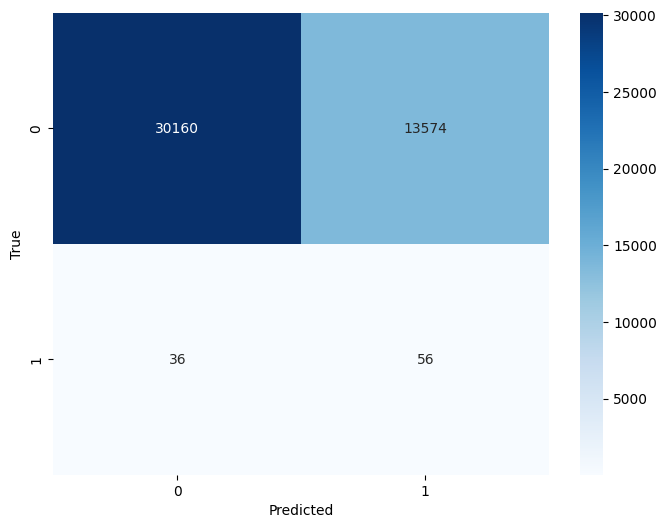

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Mostra a curva ROC

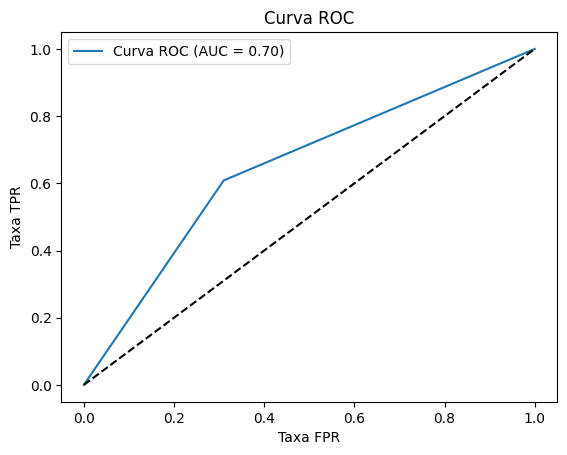

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
a = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

Mostra outras métricas

In [ ]:
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

Precisão: 0.00
Recall: 0.61
F1: 0.01


**CatBoost**

Conjunto de parâmetros para validação

Death: tamanho máximo da árvore

loss_function: função de loss

min_data_in_leaf: mínimo de instâncias em cada folha

eval_metric: métrica de medida

bootstrap_type: Define o método para amostragem dos pesos dos objetos

grow_policy: construção da árvore

In [ ]:
parameters_CB = {'depth':[3,5,7], 'random_seed':[42], 'loss_function':['Logloss'],'min_data_in_leaf':[8,10,20], 'eval_metric': ['AUC'], 'bootstrap_type': ['Bernoulli'],'grow_policy': ['SymmetricTree'], 'verbose':[0]}

Instancia o modelo

In [ ]:
CB = CatBoostClassifier()

In [ ]:
grid4 = GridSearchCV(CB, parameters_CB)

Cria o pipeline de execução

In [ ]:
clf4 = make_pipeline(grid4)

Treina o modelo

In [ ]:
clf4.fit(normalized_data_train,y_resampled)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f374a05c6d0>,
                              param_grid={'bootstrap_type': ['Bernoulli'],
                                          'depth': [3, 5, 7],
                                          'eval_metric': ['AUC'],
                                          'grow_policy': ['SymmetricTree'],
                                          'loss_function': ['Logloss'],
                                          'min_data_in_leaf': [8, 10, 20],
                                          'random_seed': [42],
                                          'verbose': [0]}))])

Melhores hiperparâmetros

In [ ]:
grid4.best_params_

{'bootstrap_type': 'Bernoulli',
 'depth': 7,
 'eval_metric': 'AUC',
 'grow_policy': 'SymmetricTree',
 'loss_function': 'Logloss',
 'min_data_in_leaf': 8,
 'random_seed': 42,
 'verbose': 0}

Cria um modelo com os melhores hiperparâmetros, adicionando peso

In [ ]:
modelCB = CatBoostClassifier(depth=7, random_seed=42, bootstrap_type= 'Bernoulli', eval_metric= 'AUC', grow_policy= 'SymmetricTree', loss_function= 'Logloss', min_data_in_leaf= 8, verbose= 0, class_weights ={0: 1, 1: 200})

Treina o modelo com o dataset com oversample

In [ ]:
modelCB.fit(normalized_data_train,y_resampled)

Mostra a ACC do modelo. Muito baixa.

In [ ]:
y_pred = modelCB.predict(normalized_data_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy=%.2f%%" % (accuracy * 100))

accuracy=55.51%


O modelo foi razoável na classificação de fraudes, porém, por conta dos pesos, muitas não fraudes foram classificadas com fraudes

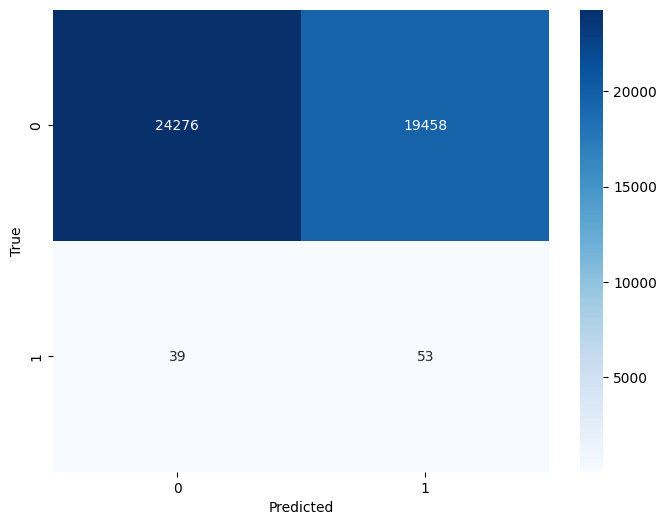

In [ ]:
y_pred = modelCB.predict(normalized_data_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Plota a curva ROC

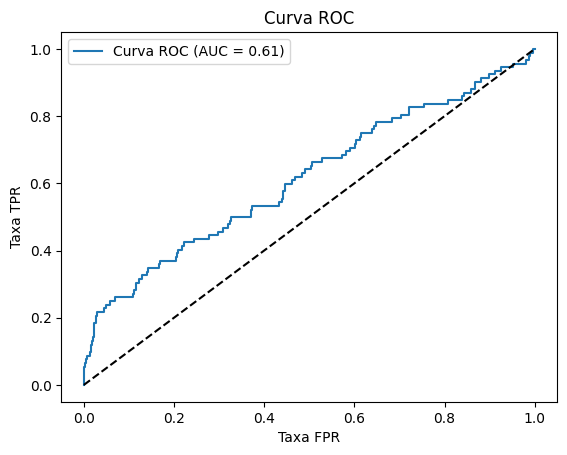

In [ ]:
probs = modelCB.predict_proba(normalized_data_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
a = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

Mostra as outras métricas

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

Precisão: 0.00
Recall: 0.58
F1: 0.01


Cria um novo modelo com pesos maiores

In [ ]:
modelCB = CatBoostClassifier(depth=7, random_seed=42, bootstrap_type= 'Bernoulli', eval_metric= 'AUC', grow_policy= 'SymmetricTree', loss_function= 'Logloss', min_data_in_leaf= 8, verbose= 0, class_weights ={0: 1, 1: 12000})

Treina o modelo com o dataset com undersamplo para 50000

In [ ]:
modelCB.fit(normalized_data_train2, y_under1)

Mostra a ACC do modelo

In [ ]:
y_pred = modelCB.predict(normalized_data_test2)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy=%.2f%%" % (accuracy * 100))

accuracy=75.85%


A classificação melhorou em relação ao modelo passado

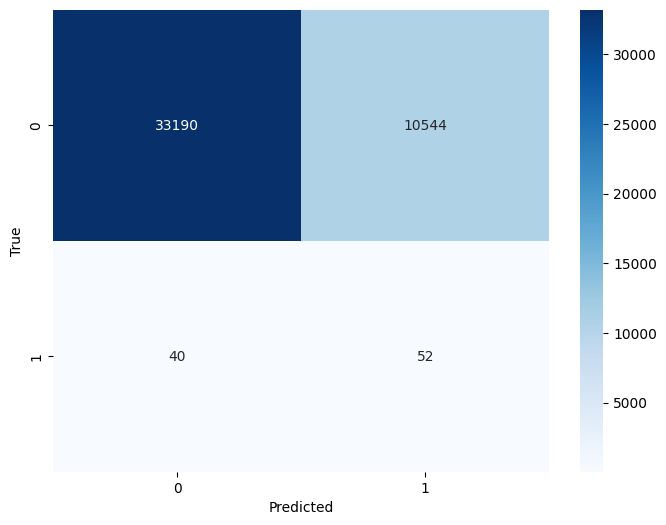

In [ ]:
y_pred = modelCB.predict(normalized_data_test2)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

A curva ROC também melhorou

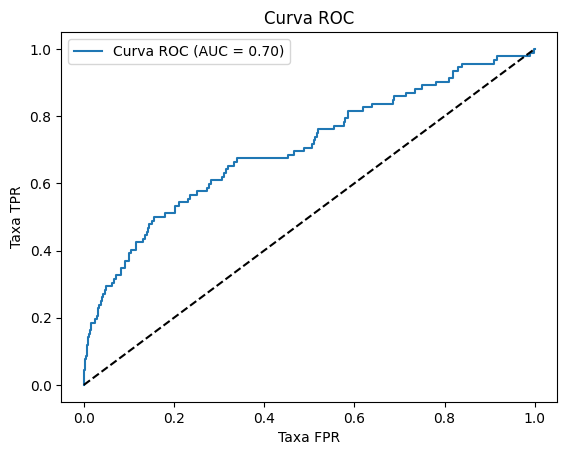

In [ ]:
probs = modelCB.predict_proba(normalized_data_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
a = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

Mostra outras métricas

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

Precisão: 0.00
Recall: 0.57
F1: 0.01


Rank de modelos: FNN com data set original e peso, Perceptron, CatBoost com undersample e peso, DecisionTree, KNN

Rank da competição: https://www.kaggle.com/competitions/playground-series-s3e4/leaderboard

Melhorias futuras: Classificar uma quantidade parecida de fraudes, ao mesmo tempo que classificar menos não fraudes como fraudes